# EDA (Exploratory Data Analysis) STEAM DATASETS
##### En este análisis exploratorio de datos, entenderemos las correlaciones y transformaciones necesarias que son esenciales para lograr generar datasets con información relevante y útil a los propósitos de este proyecto. 

#### 1. IMPORTAR LIBRERÍAS

In [98]:
# Importamos pandas para el análisis de datos tabulares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#Biblioteca para crear nubes de palabras en Python
from wordcloud import WordCloud 
import ast 


### 2. CARGA DE DATOS

In [83]:
df_user_reviews = pd.read_csv(r'C:\PI1_copia\data\DataLimpia\user_reviews_cln.csv')
df_user_items = pd.read_csv(r'C:\PI1_copia\data\DataLimpia\users_items_cln.csv')
df_steam_games = pd.read_csv(r'C:\PI1_copia\data\DataLimpia\steam_games_cln.csv')

In [213]:
#Datos de idioma en user reviews para analizar con WordCloud
df_lang =  pd.read_csv(r'C:\PI1_copia\data\DataLimpia\lang_info.csv')

In [86]:
# include='all' proporciona un resumen adicional de los datos en el método "describe"
df_user_reviews.describe(include='all') 

,user_id,funny,item_id,recommend,year_posted,sentiment_analysis
count,45755,6610,45755.000000,45755,43625.0,45755.000000
unique,20431,176,NaN,2,<NA>,NaN
top,chicken_tonight,1 person found this review funny,NaN,True,<NA>,NaN
freq,20,4120,NaN,40084,<NA>,NaN
mean,NaN,NaN,176893.365337,NaN,2014.26792,1.521735
std,NaN,NaN,131096.444885,NaN,0.842608,0.789143
min,NaN,NaN,10.000000,NaN,2010.0,0.000000
25%,NaN,NaN,21090.000000,NaN,2014.0,1.000000
50%,NaN,NaN,218620.000000,NaN,2014.0,2.000000
75%,NaN,NaN,265930.000000,NaN,2015.0,2.000000


En el caso de la columna user_id, item_id y recommend, veo que existe una relación en el count, en este caso percibo que dichas columnas son importantes para relacionar posteriormente las tablas y realizar transformaciones. En el caso de los años es comprensible que no aplique la misma cifra, puesto que los años podrían repetirse para diversos comentarios o recomendaciones. 

También es importande ver que en user_id hay 20.431 usuarios únicos lo cual me hace pensar que el mismo usuario ha jugado en diversos años, diferentes juegos y ha escrito opiniones o comentarios ne diferentes épocas. 

In [35]:
#Contamos los valores nulos de la columna funny
df_user_reviews["funny"].isna().value_counts()


funny
True     39145
False     6610
Name: count, dtype: int64

In [34]:
#Contamos los valores nulos de la columna year_posted
f_user_reviews["year_posted"].isna().value_counts()

year_posted
False    43625
True      2130
Name: count, dtype: int64

Vemos que las columnas year_posted y funny, contienen gran cantidad de datos nulos. En total 82.770. Sobre esto los más relevantes podrían ser los relacionados a year_posted, los cuales podríamos rellenar más adelante con el método de interpolación de datos. 

En cuanto los datos faltantes de la columna funny, estos podríamos eliminarlos, ya que no son necesariamente relevantes, porque nos basaremos en el análisis de sentimientos de la reseña escrita por los usuarios. Sin embargo podríamos dejarla temporalmente para contrastar el análisis de sentimientos con la columna funny y ver si hay una correlación. 

In [38]:
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45755 entries, 0 to 45754
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             45755 non-null  object 
 1   funny               6610 non-null   object 
 2   item_id             45755 non-null  int64  
 3   recommend           45755 non-null  bool   
 4   year_posted         43625 non-null  float64
 5   sentiment_analysis  45755 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 1.8+ MB


El método info nos permite ver que el tipo de datos que tenemos en cada columna y las cantidades. En este caso se hace evidente que la columna "funny" debe ser eliminada. 

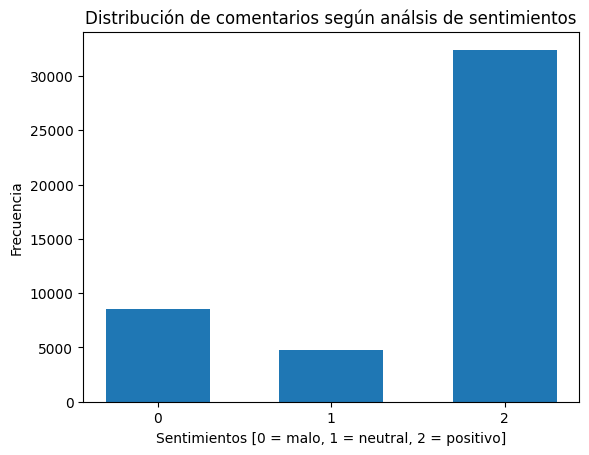

In [42]:
plt.hist(df_user_reviews["sentiment_analysis"], bins=range(0, 4), align='left', rwidth=0.6)
plt.xlabel("Sentimientos [0 = malo, 1 = neutral, 2 = positivo]")
plt.ylabel("Frecuencia")
plt.title("Distribución de comentarios según análsis de sentimientos")
plt.xticks(range(3));

plt.show()

En el histograma anterior podemos ver la distribución de los datos para la columna "Análsis de sentimientos" agrupados de acuerdo al número de comentarios negativos, neutrales y positivos. Es evidente que los datos están en mayor madida hacia extremos opuestos, sin embargo no parece haber una distribución anormal de los mismos. 

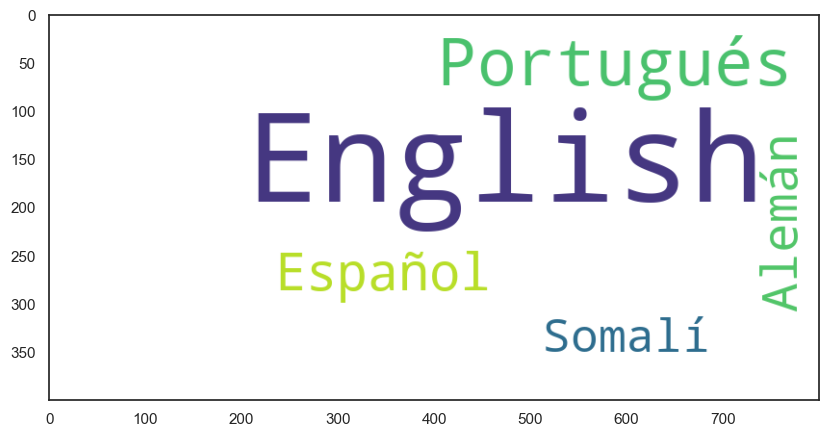

In [ ]:
# Crear un diccionario con los datos del DataFrame
df_lang_dict = dict(zip(df_lang['Idioma'], df_lang['Conteo']))

# Colores personalizados
colores = ['pink', 'green', 'red', 'purple', 'orange']

# Crear la nube de palabras con colores personalizados
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(df_lang_dict)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

Análizamos en el dataframe user_reviews el idioma de los comentarios más frecuentes, esto nos da una idea de en dónde debemos centrar el entrenamiento del modelo de análisis de sentimientos NLTK  (Natural Language Toolkit) que alñ final proporciona una puntuación compuesta que puede ser utilizada para clasificar la polaridad de las reseñas en negativas (valor '0'), neutrales (valor '1') o positivas (valor '2'). A las reseñas escritas ausentes, se les asignó el valor de '1'.

In [61]:
# Calcula valores en la columna 'recommend' 
recom_count = df_user_reviews['recommend'].value_counts()
recom_perc = df_user_reviews['recommend'].value_counts(normalize=True) * 100


# Crear un nuevo DataFrame con el conteo y porcentaje
total_recom = pd.DataFrame({
    'Conteo': recom_count,
    'Porcentaje': recom_perc.round(2).astype(str) + '%'
})

# Ordenar el DataFrame por el conteo de mayor a menor
total_recom = total_recom .sort_values(by='Conteo', ascending=False)

In [62]:
total_recom

,Conteo,Porcentaje
recommend,,
True,40084,87.61%
False,5671,12.39%


Pie Chart con la proporción de reomendaciones True/False


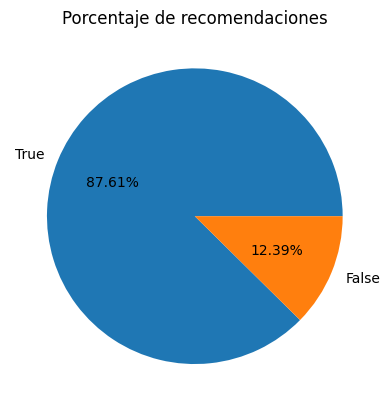

In [63]:

# Datos
conteo = [40084, 5671]
porcentaje = [87.61, 12.39]
labels = ['True', 'False']

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear el piechart
ax.pie(conteo, labels=labels, autopct='%1.2f%%')

# Añadir título
plt.title('Porcentaje de recomendaciones')

# Mostrar el piechart
plt.show()



In [85]:
#Convertimos el año a entero
df_user_reviews["year_posted"] = df_user_reviews["year_posted"].astype("Int64")



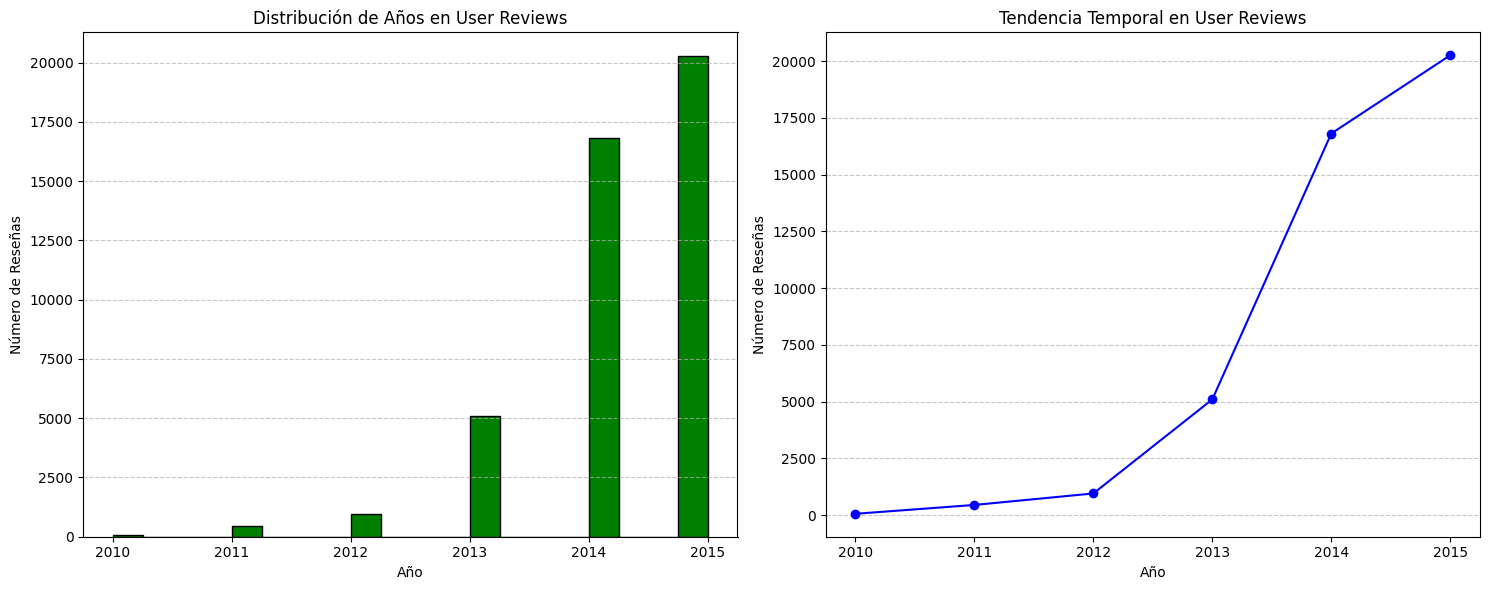

In [149]:
# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de líneas para mostrar tendencias temporales
trends = df_user_reviews['year_posted'].value_counts().sort_index()
axs[1].plot(trends.index, trends.values, marker='o', linestyle='-', color='blue')
axs[1].set_title('Tendencia Temporal en User Reviews')
axs[1].set_xlabel('Año')
axs[1].set_ylabel('Número de Reseñas')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Histograma de la distribución de años
axs[0].hist(df_user_reviews['year_posted'], bins=20, color='green', edgecolor='black')
axs[0].set_title('Distribución de Años en User Reviews')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Número de Reseñas')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)


# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

MATRIZ DE CORRELACIONES 


Ahora haremos la unión del data set user_items con user_reviews para explorar posibles correlaciones y descubrir que otros aspectos interesantes hay que nos lleven a trabajar de mejor forma las consultas posteriores que debemos disponibilizar para ser consumidas por la API de forma eficiente, eliminando todo aquello que no sea util a nuetros propósito. 

In [198]:
matriz_corr = joint_items_games.drop(["user_id", "item_name", "genres"], axis=1)

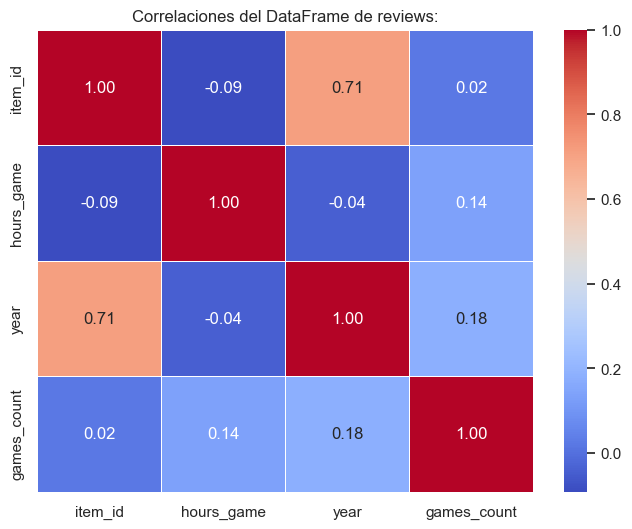

In [199]:
# matriz de correlación:
correlation_matrix = matriz_corr.corr()

# Configuramos el mapa de correlaciones con seaborn:
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlaciones del DataFrame de reviews:")

plt.show()

Mapa de correlaciones del DataFrame de reviews e items:

En la anterior matriz vemos que hay una fuerte correlación entre el año de lanzamiento y el juego, lo cual ha de suponer que de igual forma debe haber una relación entre el genero y los años. 

In [203]:
#aplicar inner join a los df
joint_reviews_games = pd.merge(df_user_reviews, df_steam_games[['item_id', 'year', 'genres']], on='item_id', how='inner')

In [206]:
# Guaradamos el resultado del merge en un nuevo df
matriz_corr_reviews = joint_reviews_games.drop(["genres", "funny", "user_id", "year_posted"], axis=1)
matriz_corr_reviews 

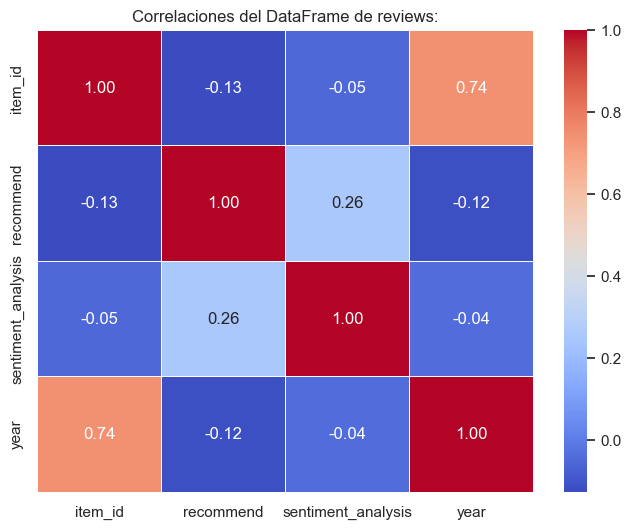

In [209]:
#Aplicamos la matriz de correlación a los df unidos user_reviews y steam_games:
correlation_matrix2 = matriz_corr_reviews.corr()

# Configuramos el mapa de correlaciones con seaborn:
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlaciones del DataFrame de reviews:")

plt.show()

In [158]:
#aplicar inner join a los df
joint_items_games = pd.merge(df_user_items, df_steam_games[['item_id', 'year', 'genres']], on='item_id', how='inner')

#Convertir columna year a entero
joint_items_games["year"] = joint_items_games["year"].astype("Int64")

#Convertimos la columna genres a tipo lista
joint_items_games['genres'] = joint_items_games['genres'].apply(ast.literal_eval)

#Expandimos las listas en columnas
joint_items_games = joint_items_games.explode('genres').reset_index(drop=True)

#Se crea la columna "games_count" para codificar el número de veces que se repite un juego
joint_items_games["games_count"] = joint_items_games["item_name"].map(joint_items_games["item_name"].value_counts())

Exploramos además cuáles son las categorías más populares

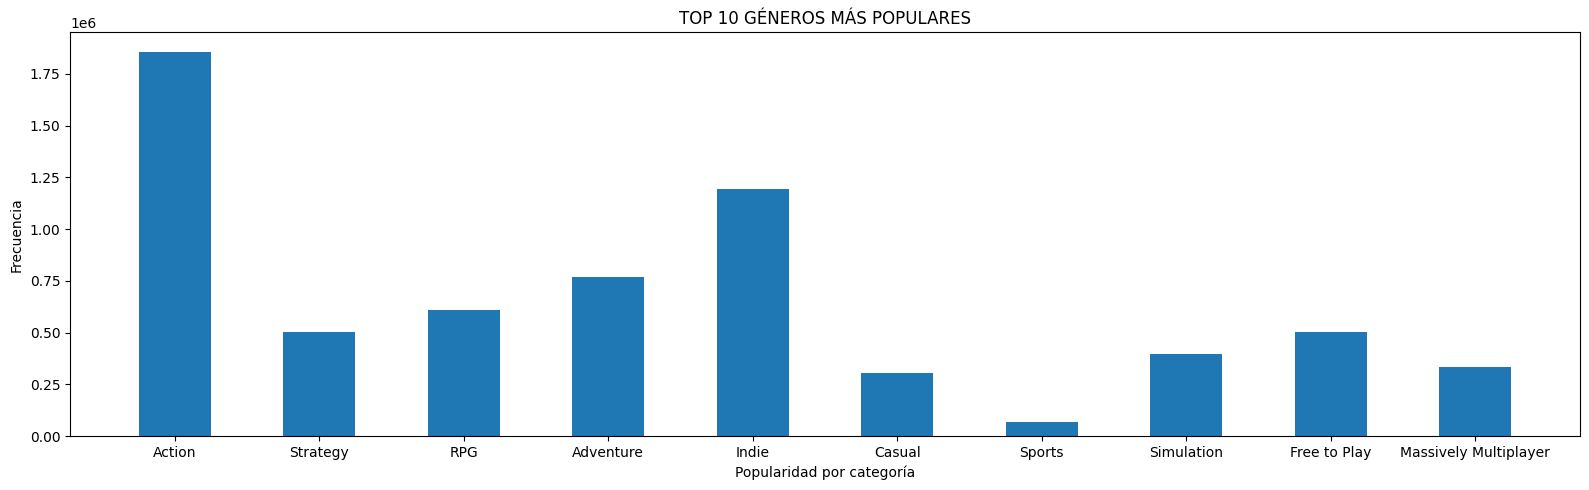

In [182]:
fig, axs = plt.subplots(1, figsize=(16, 5))
plt.hist(joint_items_games["genres"], bins=range(0, 11), align='left', rwidth=0.5)
plt.xlabel("Popularidad por categoría")
plt.ylabel("Frecuencia")
plt.title("TOP 10 GÉNEROS MÁS POPULARES");

# Ajustar el diseño
plt.tight_layout()

plt.show()